In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
train_dir="/content/drive/MyDrive/face/Faces/Face"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 2562 images belonging to 31 classes.


In [46]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [47]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_10 (Bat  (None, 111, 111, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                      

In [48]:
history = model.fit(train_ds,epochs= 20, batch_size=32)

Epoch 1/20
81/81 [==============================] - 565s 7s/step - loss: 3.1058 - accuracy: 0.1702
Epoch 2/20
81/81 [==============================] - 314s 4s/step - loss: 1.8996 - accuracy: 0.4532
Epoch 3/20
81/81 [==============================] - 314s 4s/step - loss: 1.3080 - accuracy: 0.6058
Epoch 4/20
81/81 [==============================] - 313s 4s/step - loss: 0.9393 - accuracy: 0.7135
Epoch 5/20
81/81 [==============================] - 315s 4s/step - loss: 0.7463 - accuracy: 0.7752
Epoch 6/20
81/81 [==============================] - 314s 4s/step - loss: 0.4179 - accuracy: 0.8821
Epoch 7/20
81/81 [==============================] - 313s 4s/step - loss: 0.2840 - accuracy: 0.9200
Epoch 8/20
81/81 [==============================] - 321s 4s/step - loss: 0.2627 - accuracy: 0.9274
Epoch 9/20
81/81 [==============================] - 315s 4s/step - loss: 0.1388 - accuracy: 0.9664
Epoch 10/20
81/81 [==============================] - 324s 4s/step - loss: 0.1055 - accuracy: 0.9742
Epoch 11/

In [49]:
import pickle

In [50]:
model.save("my_model.h5")

# Lưu history
with open("history.pickle", "wb") as f:
    pickle.dump(history.history, f)

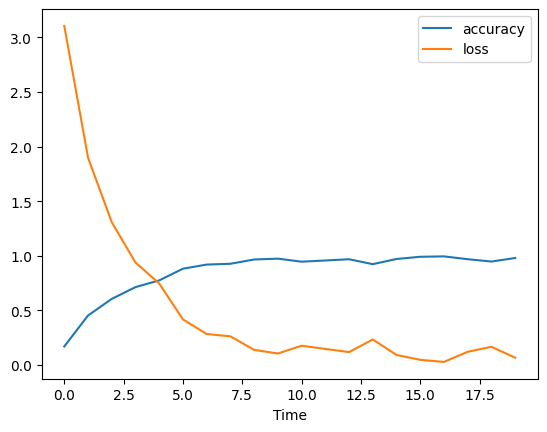

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()